In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
#Read the daily temperature data for Yosemite
df = pd.read_csv('example_yosemite_temps.csv')

INFO - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



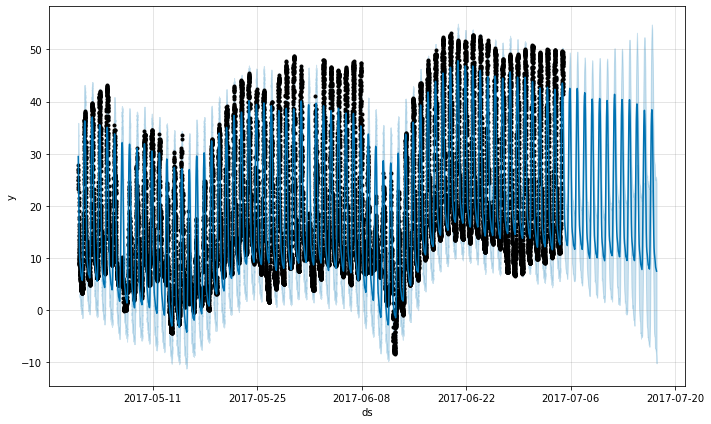

In [4]:
#If the data granularity is finer than daily, daily seasonality will automatically be fit
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensio

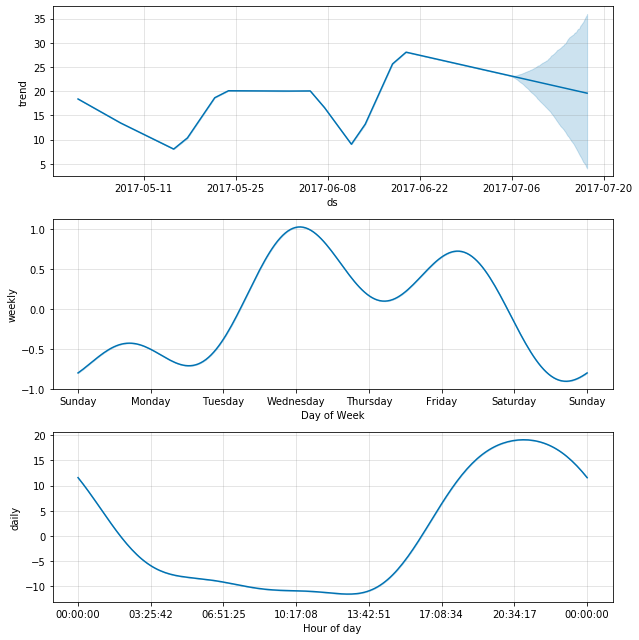

In [5]:
#Let's examine the hourly effect
fig = m.plot_components(fcst)

INFO - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



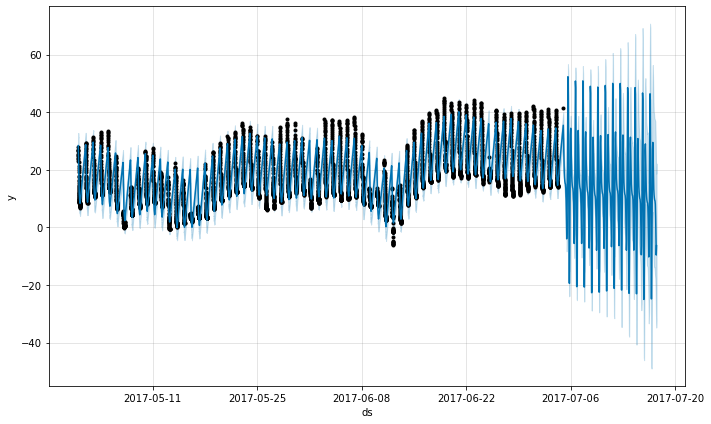

In [6]:
#Suppose our data only captured temperatures from 00:00-06:00
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



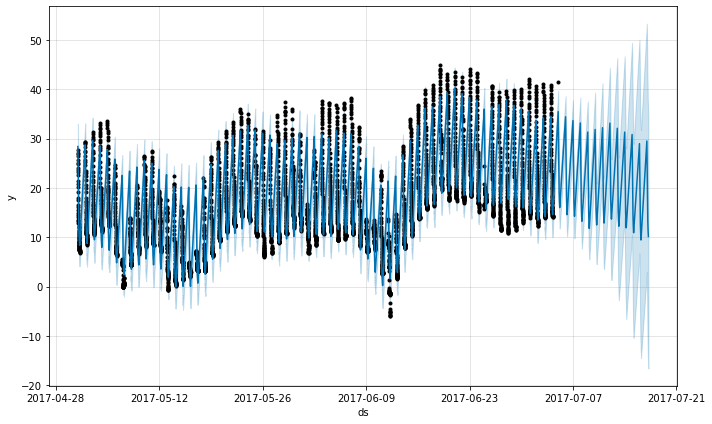

In [7]:
#Clearly the forecast is poor when we only observe 25% of the day, so we must not extrapolate
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



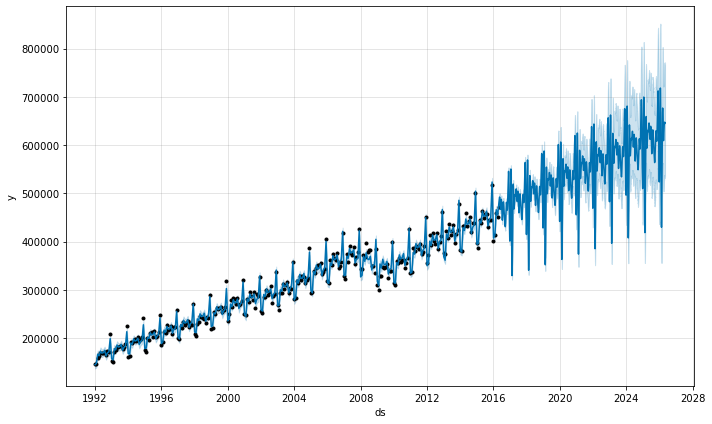

In [8]:
#Predict US retail sales volume over the next 10 years
df = pd.read_csv('example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

In [9]:
#When we fit the yearly seasonality, it only has data for the first day of each month and as such it will be overfit for the other days.
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
WARNING - n_eff / iter below 0.001 indicates that the effective sample size has likely been overestimated
WARNING - Rhat above 1.1 or below 0.9 indicates that the chains very likely have not mixed
WARNING - 8 of 8 iterations ended with a divergence (100 %).
WARNING - Try running with adapt_delta larger than 0.8 to remove the divergences.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is dep

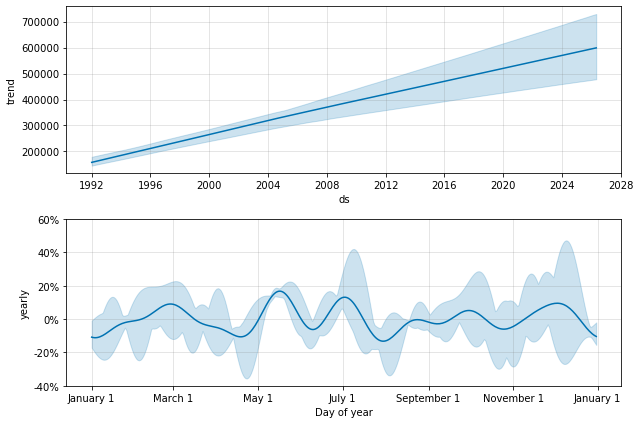

In [10]:
#As expected, uncertainty is lowest on the first day of each month
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=3).fit(df)
fcst = m.predict(future)
fig = m.plot_components(fcst)

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



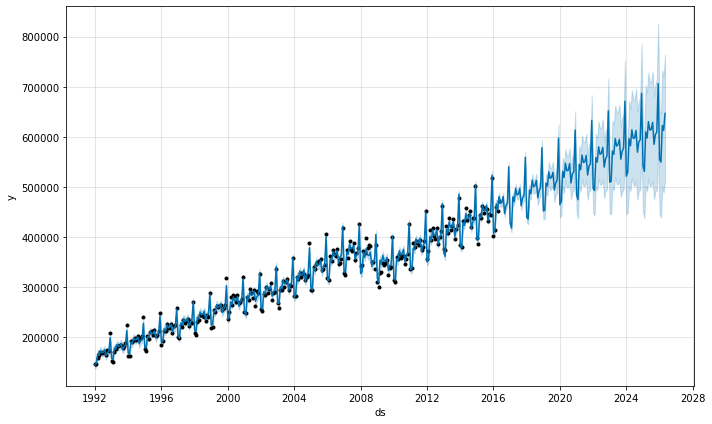

In [12]:
#Given that we have monthly data, monthly forecasting must be specified
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)